Warning message:
“Removed 8 rows containing missing values (`geom_point()`).”


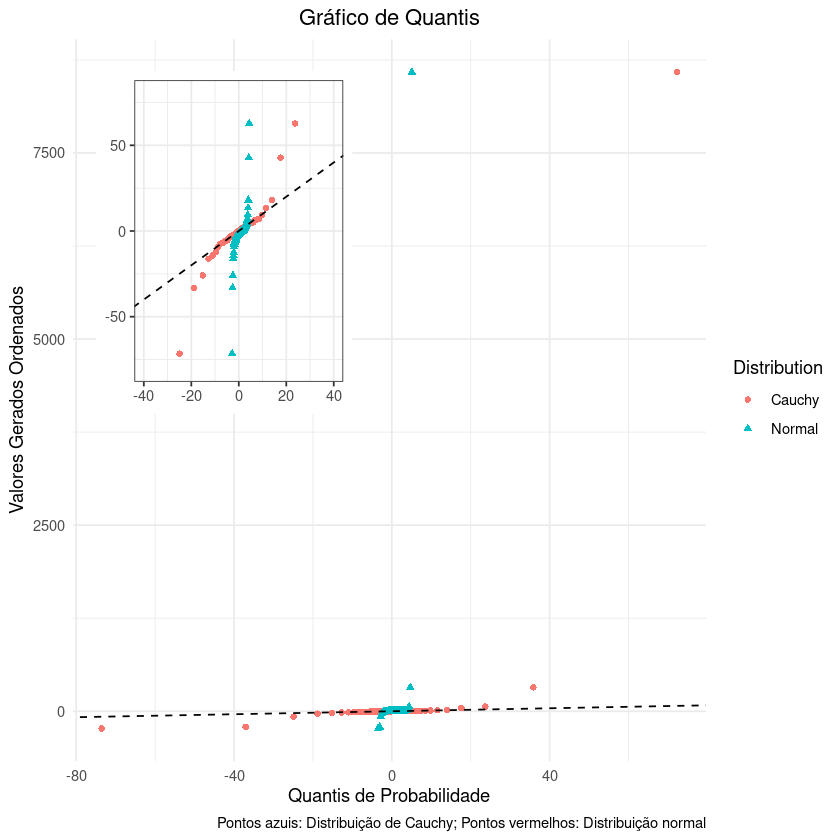

In [2]:
# Carregar a biblioteca
library(ggplot2)

# Definir a semente para reprodutibilidade
set.seed(2015)

# Gerar uma amostra de tamanho 190 com distribuição de Cauchy
loc <- -0.6
scale <- 1.2
sample_cauchy <- rcauchy(190, loc, scale)

# Ordenar a amostra
sample_sorted <- sort(sample_cauchy)

# Calcular os quantis de probabilidade para a amostra Cauchy e para uma normal
prob <- (1:190) / (190 + 1)
quantiles_cauchy <- qcauchy(prob, loc, scale)
quantiles_norm <- qnorm(prob, mean = 0.8, sd = sqrt(2.8))

# Criar um dataframe para plotar
df <- data.frame(
  Sample = rep(sample_sorted, 2),
  Quantiles = c(quantiles_cauchy, quantiles_norm),
  Distribution = rep(c("Cauchy", "Normal"), each = 190)
)

# Criar plot principal
main_plot <- ggplot(df, aes(x = Quantiles, y = Sample, color = Distribution, shape = Distribution)) +
             geom_point() +
             geom_abline(intercept = 0, slope = 1, linetype = "dashed") +
             labs(
                title = "Gráfico de Quantis",
                x = "Valores Gerados Ordenados",
                y = "Quantis de Probabilidade",
                caption = "Pontos azuis: Distribuição de Cauchy; Pontos vermelhos: Distribuição normal"
                ) +
             theme_minimal() +
             scale_y_continuous(name = "Valores Gerados Ordenados") +
             scale_x_continuous(name = "Quantis de Probabilidade") +
             theme(plot.title = element_text(hjust = 0.5))

# Criar inset plot
inset_plot <- ggplot(df, aes(x = Quantiles, y = Sample, color = Distribution, shape = Distribution)) +
              geom_point() +
              geom_abline(intercept = 0, slope = 1, linetype = "dashed") +
              xlim(-40,40) + ylim(-80,80) +
              theme_bw() +
              theme(legend.position = "none",
                    axis.title = element_blank()) 

inset_grob <- ggplotGrob(inset_plot)
main_plot + annotation_custom(grob = inset_grob, xmin = -75, xmax = -10, ymin = 4000, ymax = 8600)